In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import sympy as sm
from scipy import signal
# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/My Drive/'

# Symbols

In [2]:
z = sm.Symbol('z', complex=True)
r = sm.Symbol('r', real=True, possitive=True)
n = sm.Symbol('n', integer=True)
Omega = sm.Symbol('Omega', real=True)


# Exercise 1

## Z-transform and ROC

In [3]:
u = sm.Heaviside(n, 1)
x_ = sm.Rational(1,3)**n
x = u*x_
x

3**(-n)*Heaviside(n, 1)

In [4]:
X = sm.Sum(x * z**(-n), (n, -sm.oo, sm.oo))
X

Sum(3**(-n)*z**(-n)*Heaviside(n, 1), (n, -oo, oo))

In [5]:
X = sm.Sum(x_ * z**(-n), (n, 0, sm.oo))
X

Sum(3**(-n)*z**(-n), (n, 0, oo))

In [6]:
X.doit()

Piecewise((1/(1 - 1/(3*z)), 1/(3*Abs(z)) < 1), (Sum(3**(-n)*z**(-n), (n, 0, oo)), True))

## Zero pole diagram

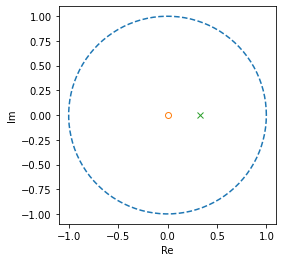

In [7]:
zeros = [0]
poles = [1/3]

def zplane(zeros, poles):
  r = 1
  theta = np.linspace(0, 2*np.pi, 100)
  fig, ax = plt.subplots(1, 1)
  ax.plot(r*np.cos(theta), r*np.sin(theta), linestyle='--')
  ax.plot(np.real(zeros), np.imag(zeros), marker='o', fillstyle='none')
  ax.plot(np.real(poles), np.imag(poles), marker='x', fillstyle='none')
  ax.set_aspect('equal')
  ax.set_xlabel('Re')
  ax.set_ylabel('Im')

zplane(zeros, poles)

## Frequency response

Text(0.5, 0, '$\\Omega$ (rad)')

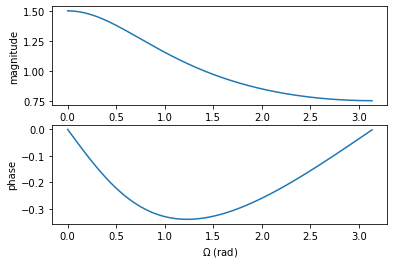

In [8]:
k_gain = 1
Omega, H = signal.freqz_zpk(zeros, poles, k_gain)

fig, axs = plt.subplots(2, 1)
axs[0].plot(Omega, np.abs(H))
axs[0].set_ylabel('magnitude')
axs[1].plot(Omega, np.angle(H))
axs[1].set_ylabel('phase')
axs[1].set_xlabel('$\Omega$ (rad)')